# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [ ]:
w = data[data.race=='w']
b = data[data.race=='b']
nwhite=w.id.count()
nblack=b.id.count()
callw=w.id[w.call==1].count()
callb=b.id[b.call==1].count()
pwhite=callw/nwhite
pblack=callb/nblack
print ("pwhite is:", pwhite)
print ("pblack is:", pblack)

In [17]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [119]:
#data.columns


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here
 
 Q1
---------------------    
    
Two-Sample t-Test for Equal Means
Purpose:
Test if two population means are equal	The two-sample t-test (Snedecor and Cochran, 1989) is used to determine if two population means are equal. A common application is to test if a new process or treatment is superior to a current process or treatment.

Central limit theory applies here because the sample population is randomly selected, normal and independent of each other.
</p>
Randomly selected - Stated in the header
Normal- Sample size > 30, each probability (getting a call or not getting a call for black or white) > 10


 Q2
--------------------- 

Null hypothesis is: P_black = P_white which is equal to, P_black-P_white=0
Alternate is: P_black <> P_white

</p>
</div>

<div class="span5 alert alert-success">
<p>

Q3
---------------------    
Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

Confidence interval is %95.
See margin and [margins] below for margin of error

T value is 4.1155
We are %95 confident that, P1-P2 is within the margins [0.016777447859559147, 0.047288260559332024], which are 1,96 std away from the mean.

!!

Hypothesis tesing:
Null hypothesis is: P_black = P_white which is equal to, P_black-P_white=0
Alternate is: P_black <> P_white
Confidence interval is %95.
See margin and [margins] below for margin of error

T value is 4.11, which is greater than 1.96 in magnitude, which is more extreme, so our hypothesis is to be rejected.
p_value is less than our alpha number (significance value), which is 0.05 for the given confidence interval.

</p>
</div>

In [66]:
# Your solution to Q3 here


std=np.sqrt(      ((pwhite*(1-pwhite))/nwhite) + ((pblack*(1-pblack))/nblack)    )
mu_diff=pwhite-pblack
T=mu_diff/std
T

4.11555043573

In [55]:
margin=1.96*std
margin

0.015255406349886438

In [56]:
margins=[mu_diff-margin,mu_diff+margin]

margins

[0.016777447859559147, 0.047288260559332024]

In [113]:
import scipy.stats as stats
p_value = stats.norm.cdf(-T) *2  #two tailed test
p_value

3.862565207522622e-05

<div class="span5 alert alert-success">
hypothesis Testing <p>
Null hypothesis is: Mu_black = Mu_white which is equal to, Mu_black-Mu_white=0
<p>
Alternate is: Mu_black <> Mu_white
</div>


In [120]:
pbar=  (callw+callb) /  (nblack+nwhite)

a = (mu_diff-0) / np.sqrt((pbar*(1-pbar)/nblack) + (pbar*(1-pbar)/ (nwhite)))   # düzeltme yap paydalar farklı olacak

P_value=1-stats.norm.cdf(a)    #this is a two tailed test, so need attention here. WE are not trying to find 
                               #the extreme values on both sides of the tail. Since we look at cumulative value, which also 
                               #includes the left tail, we should see where the cumulation stops. and we need to compare it 
                               #to our critical value, to see it it more extreme (less probable) or not
p_value


3.862565207522622e-05

<div class="span5 alert alert-success">
<p> Bootstrap method for Q3 </p>
</div>

In [79]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def frac_black_calls(blacks, whites):
    """Compute fraction of Democrat yea votes."""
    frac = sum(blacks) / len(blacks) 
    return frac

In [80]:
whites = np.array([True] * 235 + [False] * (nwhite-callw))
blacks = np.array([True] * 157 + [False] * (nblack-callb))

In [85]:
# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(whites, blacks, frac_white_calls, 5000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 157/nblack) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0


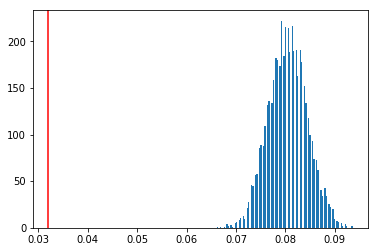

In [92]:
plt.hist(perm_replicates, bins=100)
plt.axvline(mu_diff, color='red')

In [90]:
mu_diff

0.032032854209445585

<div class="span5 alert alert-success">
<p>

Q4
---------------------    
This has already been written above, but once again:
Looking at a normal probability distribution curve of the samples, we would see that, there is less than 5% chance for our hyphotesis to be ture. Our hypothesis was "Pw=Pb". Therefore we rejected the hypothesis. So we are in favor of the alternate theory, which says the probabilty of a white sounding name getting a call is not equal to probabilty of a black sounding name getting a job.

In light of given statistic sample we can say we are 95% confident that the probability difference P1-P2 is (and %95 of the time is going to be for the appropriate future samples) within the margins [0.016777447859559147, 0.047288260559332024], which are 1,96 std away from the mean.





</p>
</div>

<div class="span5 alert alert-success">
<p>

Q5
---------------------    

It would be very imprecise to say that race is "the most" important factor in callback.
Correlation between columns should be measured for this. Pearson coefficients could be calculated for each column in combination with call column and the highest number would have the highest correlation.

Example: Use this or the pearson_r function given below.
corr_mat[0,1]=np.corrcoef(data.yearsexp, data.call)

</p>
</div>

In [164]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
r=pearson_r(data.yearsexp, data.call)

# Print the result
print(r)


0.06143649028705994


In [165]:
data.race[data.race=="b"]=0
data.race[data.race=="w"]=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
